Chapter 7 - Moving Beyond Linearity, Question 9

In [3]:
library(ISLR)
library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

# (a)

In [10]:
lm.fit = lm(nox~poly(dis,3),data=Boston)
dis.lims = range(Boston$dis)
dis.grid = seq(dis.lims[1],dis.lims[2],0.1)
pred = predict(lm.fit,newdata=list(dis=dis.grid))

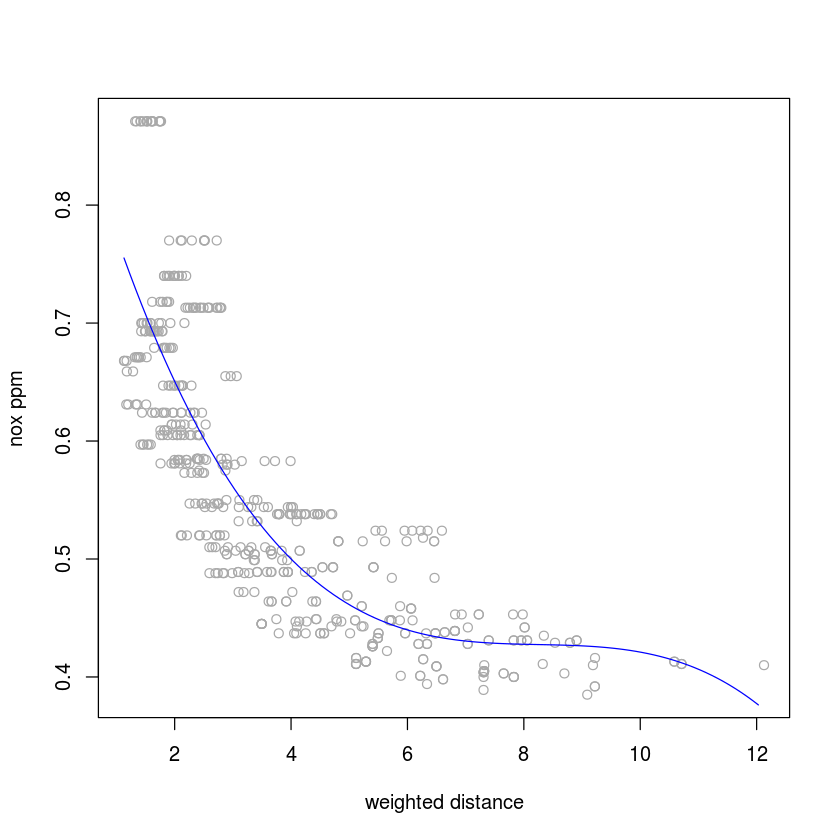

In [13]:
plot(Boston$dis,Boston$nox,col="darkgrey",xlab="weighted distance", ylab="nox ppm")
lines(dis.grid,pred,col="blue")

# (b)

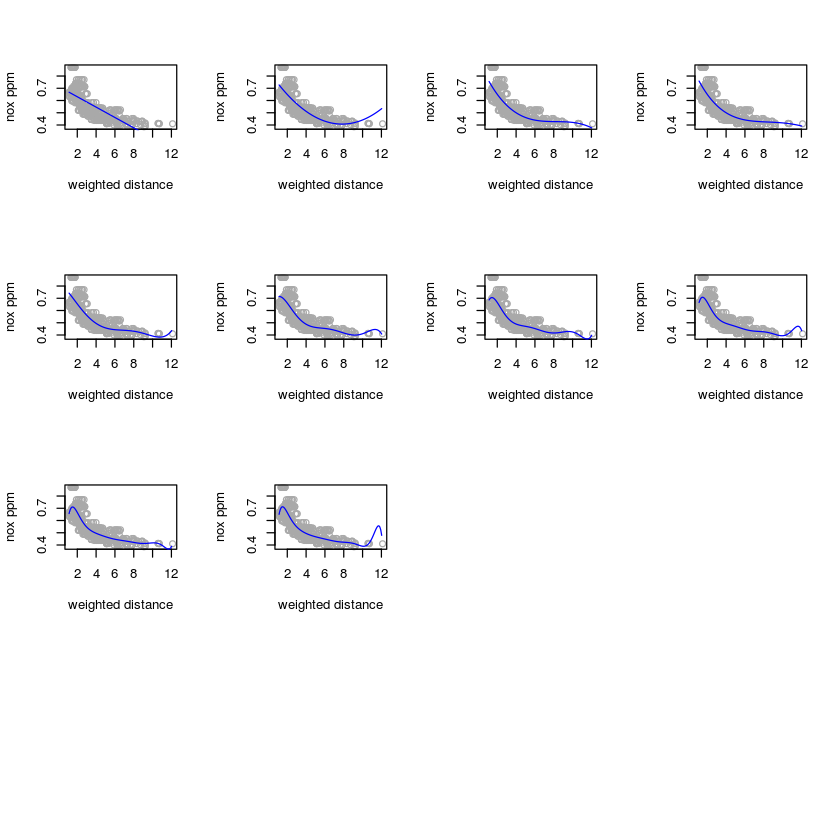

In [31]:
par(mfrow=c(4,4))
rss = c()
for(d in 1:10){
    lm.fit = lm(nox~poly(dis,d),data=Boston)
    pred = predict(lm.fit,newdata=list(dis=dis.grid))
    plot(Boston$dis,Boston$nox,col="darkgrey",xlab="weighted distance", ylab="nox ppm")
    lines(dis.grid,pred,col="blue")
    rss[d]=deviance(lm.fit)
}

In [32]:
#RSS
print(rss)

 [1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171


## (c)

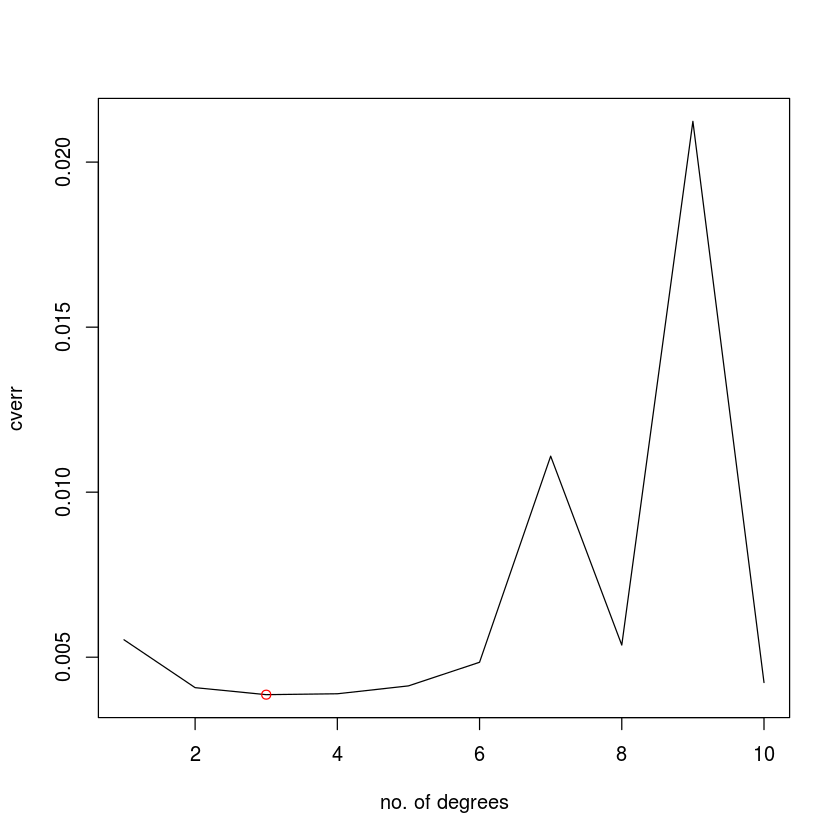

In [43]:
library(boot)
set.seed(3)
cverr = c()
for(i in 1:10){
    glm.model = glm(nox~poly(dis,i),data=Boston)
    cverr[i] = cv.glm(Boston,glm.model,K=10)$delta[2]
}
plot(cverr,type="l",xlab="no. of degrees")
min_point = which.min(cverr)
points(min_point,cverr[min_point],col="red")

In [45]:
# No. of degrees of polynomial giving the least cross validation error
min_point

[1] 3

## (d)

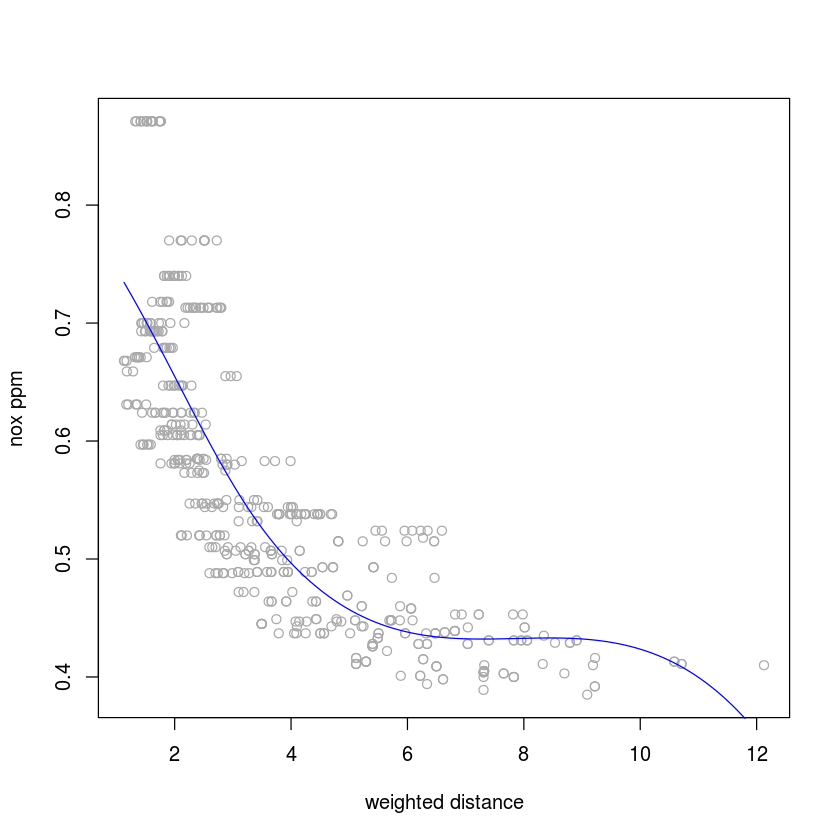

In [48]:
library(splines)
spline.model = lm(nox~bs(dis,df=4),data=Boston)
pred = predict(spline.model,newdata=list(dis=dis.grid))
plot(Boston$dis,Boston$nox,col="darkgrey",xlab="weighted distance", ylab="nox ppm")
lines(dis.grid,pred,col="blue")

The choice of the knots depend on the number of degrees of freedom

## (e)

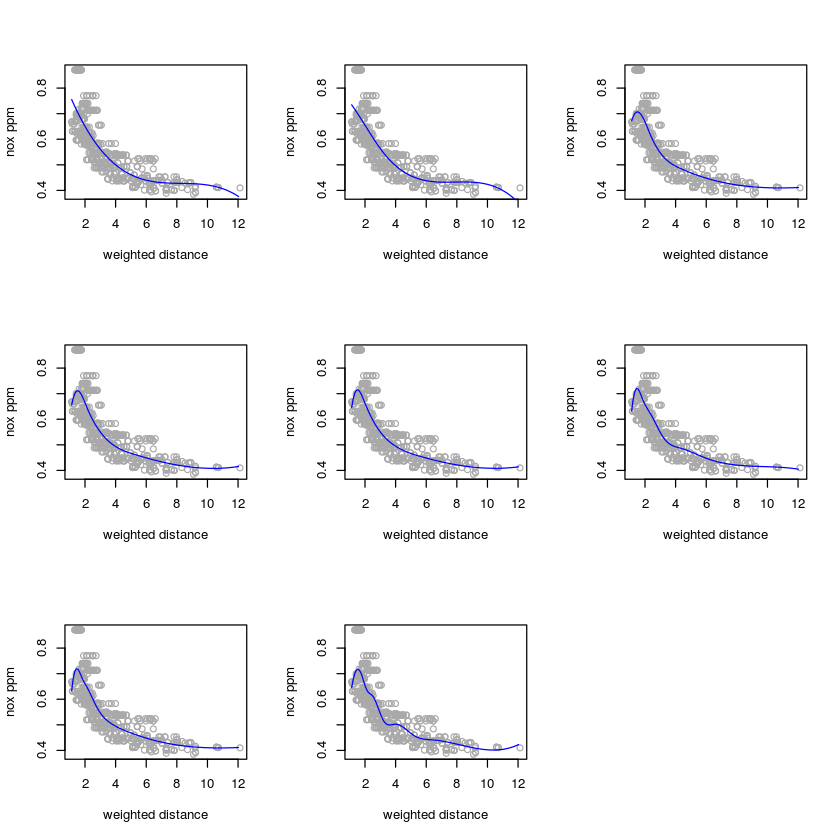

In [50]:
rss=c()
par(mfrow=c(3,3))
for(i in 3:10){
    spline.model = lm(nox~bs(dis,i),data=Boston)
    pred = predict(spline.model,newdata=list(dis=dis.grid))
    plot(Boston$dis,Boston$nox,col="darkgrey",xlab="weighted distance", ylab="nox ppm")
    lines(dis.grid,pred,col="blue")
    rss[i]=deviance(spline.model)
}

In [51]:
#rss
rss

[1]       NA       NA 1.934107 1.922775 1.840173 1.833966 1.829884 1.816995
 [9] 1.825653 1.792535

## (f)

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = structure(3.2157, .Names = "50%"), :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = structure(3.2157, .Names = "50%"), :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = st

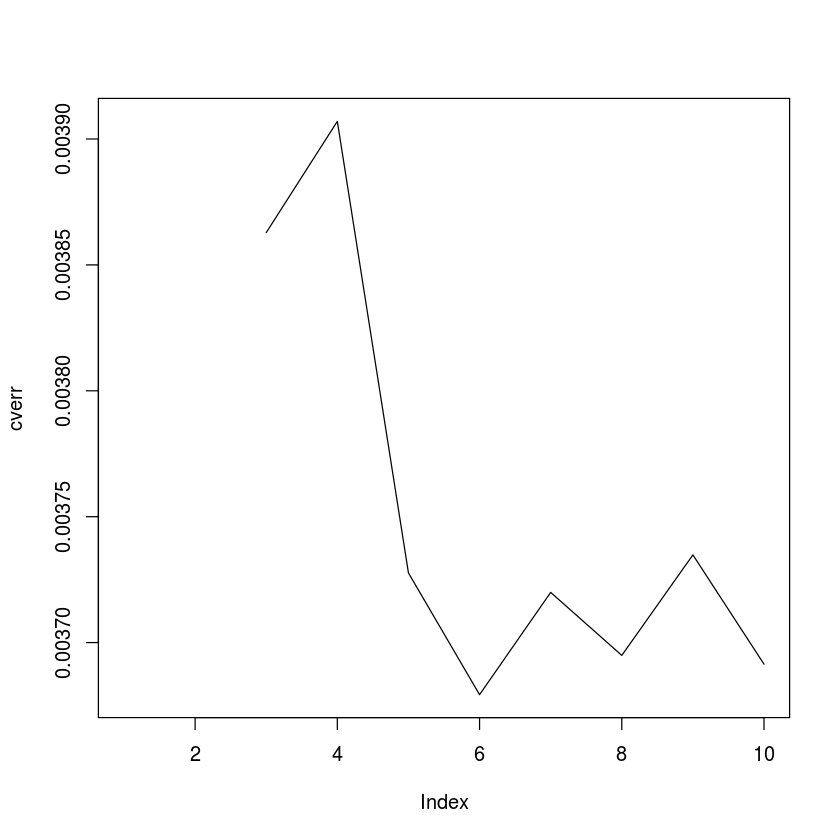

In [57]:
cverr = c()
set.seed(1)
for(i in 3:10){
    spline.model = glm(nox~bs(dis,i),data=Boston)
    cverr[i] = cv.glm(Boston,spline.model,K=10)$delta[2]
}
plot(cverr,type="l")

The 6 degrees of freedom gives the lowest cross validation error